In [180]:
import os
import numpy as np
import pandas as pd
# Pandas Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize

import json
import requests
import re
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import folium
from folium import plugins
from folium.plugins import HeatMap

from sklearn.cluster import KMeans

print('Libraries Imported.')

Libraries Imported.


In [181]:
file_path = "data/demographics/csv/Alcova-Heights.csv"
df = pd.read_csv(file_path, skiprows=2, index_col=0)
df

,Number,Percent,Number.1,Percent.1
Alcova Heights,,,,
TOTAL POPULATION,"1,900",100.00%,"207,627",100.00%
Total Non-Hispanic or Latino,"1,445",76.10%,"176,245",84.90%
White alone,"1,105",58.20%,"132,961",64.00%
Black or African-American alone,89,4.70%,"17,088",8.20%
American Indian or Alaska Native alone,5,0.30%,394,0.20%
Asian alone,185,9.70%,"19,762",9.50%
Native Hawaiian or Pacific Islander Alone,-,0.00%,133,0.10%
Some other Race alone,5,0.30%,611,0.30%
Two or more Races,56,2.90%,"5,296",2.60%


In [182]:
df.drop(df.columns[-2:], axis=1, inplace=True)
df

,Number,Percent
Alcova Heights,,
TOTAL POPULATION,"1,900",100.00%
Total Non-Hispanic or Latino,"1,445",76.10%
White alone,"1,105",58.20%
Black or African-American alone,89,4.70%
American Indian or Alaska Native alone,5,0.30%
Asian alone,185,9.70%
Native Hawaiian or Pacific Islander Alone,-,0.00%
Some other Race alone,5,0.30%
Two or more Races,56,2.90%


In [183]:
# df.columns = ['demographic', 'number', 'percent']
# df

In [184]:
# df.set_index('demographic', drop=True, inplace=True)
# df.index.name = None
# df

In [185]:
df['Percent'] = df['Percent'].str.rstrip('%').astype('float') / 100.0
df

,Number,Percent
Alcova Heights,,
TOTAL POPULATION,"1,900",1.000
Total Non-Hispanic or Latino,"1,445",0.761
White alone,"1,105",0.582
Black or African-American alone,89,0.047
American Indian or Alaska Native alone,5,0.003
Asian alone,185,0.097
Native Hawaiian or Pacific Islander Alone,-,0.000
Some other Race alone,5,0.003
Two or more Races,56,0.029


In [186]:
df['Percent'].mask(df.index.str.contains('TOTAL'), df['Number'], inplace=True)
df

,Number,Percent
Alcova Heights,,
TOTAL POPULATION,"1,900","1,900"
Total Non-Hispanic or Latino,"1,445",0.761
White alone,"1,105",0.582
Black or African-American alone,89,0.047
American Indian or Alaska Native alone,5,0.003
Asian alone,185,0.097
Native Hawaiian or Pacific Islander Alone,-,0.000
Some other Race alone,5,0.003
Two or more Races,56,0.029


In [187]:
df.drop(columns=['Number'], inplace=True)
df

,Percent
Alcova Heights,
TOTAL POPULATION,"1,900"
Total Non-Hispanic or Latino,0.761
White alone,0.582
Black or African-American alone,0.047
American Indian or Alaska Native alone,0.003
Asian alone,0.097
Native Hawaiian or Pacific Islander Alone,0.000
Some other Race alone,0.003
Two or more Races,0.029


In [188]:
df.columns = [df.index.name]
df.index.name = None
df

,Alcova Heights
TOTAL POPULATION,"1,900"
Total Non-Hispanic or Latino,0.761
White alone,0.582
Black or African-American alone,0.047
American Indian or Alaska Native alone,0.003
Asian alone,0.097
Native Hawaiian or Pacific Islander Alone,0.000
Some other Race alone,0.003
Two or more Races,0.029
Total Hispanic or Latino,0.239


In [189]:
df.dropna(inplace=True)
df

,Alcova Heights
TOTAL POPULATION,"1,900"
Total Non-Hispanic or Latino,0.761
White alone,0.582
Black or African-American alone,0.047
American Indian or Alaska Native alone,0.003
Asian alone,0.097
Native Hawaiian or Pacific Islander Alone,0.000
Some other Race alone,0.003
Two or more Races,0.029
Total Hispanic or Latino,0.239


In [190]:
df.T

,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Alcova Heights,"1,900",0.761,0.582,0.047,0.003,0.097,0.0,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.49,0.51,745,0.58,0.474,0.106,0.03,0.077,0.42,0.278,0.142,0.278,0.34,0.168,0.106,0.064,0.019,0.026,784,0.95,0.696,0.254,0.05


In [191]:
def process_demographic_csv_to_df(file_path):
    # Read csv to pandas df, skip 2 rows, set column 0 as index
    df = pd.read_csv(file_path, skiprows=2, index_col=0)
    # Drop last two columns (Arlington totals)
    df.drop(df.columns[-2:], axis=1, inplace=True)
    # Convert percentage to floats
    df['Percent'] = df['Percent'].str.rstrip('%').astype('float') / 100.0
    # Replace Total rows percent with count 
    df['Percent'].mask(df.index.str.contains('TOTAL'), df['Number'], inplace=True)
    # Drop number column 
    df.drop(columns=['Number'], inplace=True)
    # Rename percent to neighborhood name
    df.columns = [df.index.name]
    df.index.name = None
    # drop na 
    df.dropna(inplace=True)
    # Transpose df
    df = df.T
    return df

In [192]:
import os

CSV_DIR = r'data/demographics/csv/'

dfs = []
for file in os.listdir(CSV_DIR):
    df = process_demographic_csv_to_df(CSV_DIR+file)
    dfs.append(df)
arlington_demographics = pd.concat(dfs)
arlington_demographics.sort_index(inplace=True)
arlington_demographics

,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Alcova Heights,"1,900",0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,745,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,784,0.950,0.696,0.254,0.050
Arlington Forest,"2,223",0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,834,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,852,0.979,0.823,0.156,0.021
Arlington Heights,"2,555",0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,"1,032",0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,1070,0.964,0.595,0.369,0.036
Arlington Ridge,"6,324",0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,"3,549",0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,3755,0.945,0.416,0.529,0.055
Arlington View,979,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,376,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,391,0.962,0.517,0.445,0.038
Arlingwood,366,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,136,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,148,0.919,0.851,0.068,0.081
Ashton Heights,"3,962",0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,"1,715",0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,1777,0.965,0.385,0.580,0.035
Aurora Highlands,"8,725",0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,"4,804",0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,5514,0.871,0.124,0.747,0.129
Ballston - Virginia Square,"13,753",0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,"8,218",0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,8861,0.927,0.329,0.598,0.073
Barcroft,"3,477",0.632,0.497,0.050,0.002,0.057,0.001,0.003,0.022,0.368,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.529,0.471,"1,285",0.602,0.461,0.141,0.068,0.073,0.398,0.267,0.131,0.267,0.282,0.163,0.168,0.065,0.031,0.024,1327,0.968,0.518,0.451,0.032


In [193]:
population = arlington_demographics['TOTAL POPULATION'].str.replace(',', '').astype('float')
arlington_demographics['TOTAL POPULATION'] = population / population.sum()

households = arlington_demographics['TOTAL HOUSEHOLDS'].str.replace(',', '').astype('float')
arlington_demographics['TOTAL HOUSEHOLDS'] = households / households.sum()

housing = arlington_demographics['TOTAL HOUSING UNITS'].str.replace(',', '').astype('float')
arlington_demographics['TOTAL HOUSING UNITS'] = housing / housing.sum()

arlington_demographics

,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Alcova Heights,0.009497,0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
Arlington Forest,0.011111,0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
Arlington Heights,0.012771,0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
Arlington Ridge,0.031610,0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
Arlington View,0.004893,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
Arlingwood,0.001829,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
Ashton Heights,0.019803,0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
Aurora Highlands,0.043611,0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
Ballston - Virginia Square,0.068742,0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073
Barcroft,0.017379,0.632,0.497,0.050,0.002,0.057,0.001,0.003,0.022,0.368,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.529,0.471,0.013894,0.602,0.461,0.141,0.068,0.073,0.398,0.267,0.131,0.267,0.282,0.163,0.168,0.065,0.031,0.024,0.013479,0.968,0.518,0.451,0.032


In [194]:
def fetch_location(neigh):
    address = neigh + ', Arlington County, Virginia'
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    return location

# Define Columns 
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe 
arlington_neighborhoods_locations = pd.DataFrame(columns=column_names)

for i, n in enumerate(arlington_demographics.index):

    location = fetch_location(re.split('/|-', n)[0])

    lat, long = (location.latitude, location.longitude) if location else (np.nan, np.nan)
    arlington_neighborhoods_locations.loc[i] = [n, lat, long]
arlington_neighborhoods_locations

,Neighborhood,Latitude,Longitude
0,Alcova Heights,38.864557,-77.097201
1,Arlington Forest,38.868856,-77.113084
2,Arlington Heights,38.869557,-77.092201
3,Arlington Ridge,38.890396,-77.084159
4,Arlington View,38.863079,-77.072591
5,Arlingwood,38.927611,-77.121923
6,Ashton Heights,NaN,NaN
7,Aurora Highlands,38.859493,-77.061664
8,Ballston - Virginia Square,38.882006,-77.111514
9,Barcroft,38.855946,-77.103868


In [195]:
arlington_neighborhoods_locations[arlington_neighborhoods_locations.isna().any(axis=1)]

,Neighborhood,Latitude,Longitude
6,Ashton Heights,NaN,NaN
12,Boulevard Manor,NaN,NaN
15,Cherry Valley Nature Area,NaN,NaN
29,Forest Glen,NaN,NaN
36,John M Langston,NaN,NaN
37,Leeway Overlee,NaN,NaN
52,Rock Spring,NaN,NaN
54,Tara Leeway Heights,NaN,NaN
55,Waverly Hills,NaN,NaN
58,Williamsburg,NaN,NaN


In [196]:
location_patches = [
['Arlington Ridge', 38.85357, -77.06798],
['Ashton Heights', 38.87615, -77.10072],
['Aurora Highlands', 38.85420, -77.06106],
['Barcroft', 38.86201, -77.11044],
['Bluemont', 38.87823, -77.12106],
['Boulevard Manor', 38.87007, -77.13587],
['Buckingham', 38.87216, -77.10995],
['Cherrydale', 38.87216, -77.10872],
['Donaldson Run', 38.90617, -77.11617],
['Forest Glen', 38.85914, -77.12141],
['Forest Hills', 38.86952, -77.11799],
['Old Glebe', 38.92017, -77.12938],
['Rock Spring', 38.91049, -77.14109],
['Waverly Hills', 38.89593, -77.11817],
['Williamsburg', 38.90016, -77.15657]]

for l in location_patches:
    arlington_neighborhoods_locations.loc[(arlington_neighborhoods_locations.Neighborhood == l[0]), ['Latitude', 'Longitude']] = l[1:]
arlington_neighborhoods_locations.set_index('Neighborhood', inplace=True)
arlington_neighborhoods_locations

,Latitude,Longitude
Neighborhood,,
Alcova Heights,38.864557,-77.097201
Arlington Forest,38.868856,-77.113084
Arlington Heights,38.869557,-77.092201
Arlington Ridge,38.853570,-77.067980
Arlington View,38.863079,-77.072591
Arlingwood,38.927611,-77.121923
Ashton Heights,38.876150,-77.100720
Aurora Highlands,38.854200,-77.061060
Ballston - Virginia Square,38.882006,-77.111514


In [197]:
address = 'Arlington County, Virginia'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [198]:
map_arlington = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighborhood in zip(arlington_neighborhoods_locations['Latitude'], arlington_neighborhoods_locations['Longitude'], arlington_neighborhoods_locations.index):
    if(np.isnan(lat)): 
        continue 
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arlington)
    

map_arlington

In [199]:
arlington_neighborhoods = arlington_neighborhoods_locations.join(arlington_demographics, on="Neighborhood")
arlington_neighborhoods

,Latitude,Longitude,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcova Heights,38.864557,-77.097201,0.009497,0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
Arlington Forest,38.868856,-77.113084,0.011111,0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
Arlington Heights,38.869557,-77.092201,0.012771,0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
Arlington Ridge,38.853570,-77.067980,0.031610,0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
Arlington View,38.863079,-77.072591,0.004893,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
Arlingwood,38.927611,-77.121923,0.001829,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
Ashton Heights,38.876150,-77.100720,0.019803,0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
Aurora Highlands,38.854200,-77.061060,0.043611,0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
Ballston - Virginia Square,38.882006,-77.111514,0.068742,0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073


In [200]:
arlington_neighborhoods.dropna(inplace=True)
arlington_neighborhoods

,Latitude,Longitude,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcova Heights,38.864557,-77.097201,0.009497,0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
Arlington Forest,38.868856,-77.113084,0.011111,0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
Arlington Heights,38.869557,-77.092201,0.012771,0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
Arlington Ridge,38.853570,-77.067980,0.031610,0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
Arlington View,38.863079,-77.072591,0.004893,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
Arlingwood,38.927611,-77.121923,0.001829,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
Ashton Heights,38.876150,-77.100720,0.019803,0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
Aurora Highlands,38.854200,-77.061060,0.043611,0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
Ballston - Virginia Square,38.882006,-77.111514,0.068742,0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073


In [201]:
arlington_neighborhoods_cluster = arlington_neighborhoods.drop(columns=['Latitude', 'Longitude'])
arlington_neighborhoods_cluster.reset_index(drop=True, inplace=True)
arlington_neighborhoods_cluster

,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
0,0.009497,0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
1,0.011111,0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
2,0.012771,0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
3,0.031610,0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
4,0.004893,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
5,0.001829,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
6,0.019803,0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
7,0.043611,0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
8,0.068742,0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073
9,0.017379,0.632,0.497,0.050,0.002,0.057,0.001,0.003,0.022,0.368,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.529,0.471,0.013894,0.602,0.461,0.141,0.068,0.073,0.398,0.267,0.131,0.267,0.282,0.163,0.168,0.065,0.031,0.024,0.013479,0.968,0.518,0.451,0.032


Text(0.5, 0, 'K Clusters')

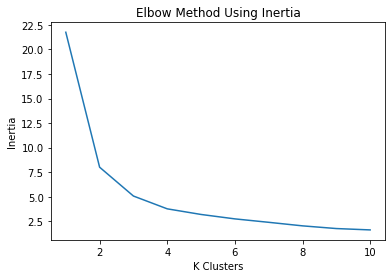

In [202]:
max_clusters = 10

inertias = []
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(arlington_neighborhoods_cluster)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), inertias)
plt.title("Elbow Method Using Inertia")
plt.ylabel("Inertia")
plt.xlabel("K Clusters")

In [203]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(arlington_neighborhoods_cluster)

arlington_neighborhoods.insert(0, 'Cluster Labels', kmeans.labels_)
arlington_neighborhoods

,Cluster Labels,Latitude,Longitude,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcova Heights,3,38.864557,-77.097201,0.009497,0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
Arlington Forest,0,38.868856,-77.113084,0.011111,0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
Arlington Heights,3,38.869557,-77.092201,0.012771,0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
Arlington Ridge,1,38.853570,-77.067980,0.031610,0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
Arlington View,2,38.863079,-77.072591,0.004893,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
Arlingwood,0,38.927611,-77.121923,0.001829,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
Ashton Heights,1,38.876150,-77.100720,0.019803,0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
Aurora Highlands,1,38.854200,-77.061060,0.043611,0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
Ballston - Virginia Square,1,38.882006,-77.111514,0.068742,0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073


In [204]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for neigh, lat, lng, cluster in zip(arlington_neighborhoods.index, arlington_neighborhoods['Latitude'], arlington_neighborhoods['Longitude'], arlington_neighborhoods['Cluster Labels']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(int(cluster)+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        popup=label, 
        color=rainbow[int(cluster)-1], 
        fill=True, 
        fill_color=rainbow[int(cluster)-1], 
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [205]:
race_ethic_demo = arlington_neighborhoods_cluster.columns[1:10]
arlington_neighborhoods_cluster_2 = arlington_neighborhoods_cluster.drop(race_ethic_demo, axis=1)
arlington_neighborhoods_cluster_2.head()

,TOTAL POPULATION,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
0,0.009497,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
1,0.011111,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
2,0.012771,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
3,0.031610,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
4,0.004893,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038


In [210]:
sex_demo = arlington_neighborhoods_cluster_2.columns[11:13]
arlington_neighborhoods_cluster_2 = arlington_neighborhoods_cluster_2.drop(sex_demo, axis=1)
arlington_neighborhoods_cluster_2

,TOTAL POPULATION,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
0,0.009497,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
1,0.011111,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
2,0.012771,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
3,0.031610,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
4,0.004893,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
5,0.001829,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
6,0.019803,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
7,0.043611,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
8,0.068742,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073
9,0.017379,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.013894,0.602,0.461,0.141,0.068,0.073,0.398,0.267,0.131,0.267,0.282,0.163,0.168,0.065,0.031,0.024,0.013479,0.968,0.518,0.451,0.032


In [217]:
family_household_demo = arlington_neighborhoods_cluster_2.columns[13:17]
arlington_neighborhoods_cluster_2 = arlington_neighborhoods_cluster_2.drop(family_household_demo, axis=1)
arlington_neighborhoods_cluster_2

,TOTAL POPULATION,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,TOTAL HOUSEHOLDS,Family households:,Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
0,0.009497,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.008055,0.580,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
1,0.011111,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.009018,0.685,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
2,0.012771,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.011159,0.529,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
3,0.031610,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.038374,0.352,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
4,0.004893,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.004066,0.598,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
5,0.001829,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.001471,0.809,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
6,0.019803,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.018544,0.451,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
7,0.043611,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.051944,0.297,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
8,0.068742,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.088859,0.240,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073
9,0.017379,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.013894,0.602,0.398,0.267,0.131,0.267,0.282,0.163,0.168,0.065,0.031,0.024,0.013479,0.968,0.518,0.451,0.032


In [221]:
nonfamily_household_demo = arlington_neighborhoods_cluster_2.columns[14:16]
arlington_neighborhoods_cluster_2 = arlington_neighborhoods_cluster_2.drop(nonfamily_household_demo, axis=1)
arlington_neighborhoods_cluster_2

,TOTAL POPULATION,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,TOTAL HOUSEHOLDS,Family households:,Nonfamily households:,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
0,0.009497,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.008055,0.580,0.420,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
1,0.011111,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.009018,0.685,0.315,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
2,0.012771,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.011159,0.529,0.471,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
3,0.031610,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.038374,0.352,0.648,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
4,0.004893,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.004066,0.598,0.402,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
5,0.001829,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.001471,0.809,0.191,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
6,0.019803,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.018544,0.451,0.549,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
7,0.043611,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.051944,0.297,0.703,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
8,0.068742,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.088859,0.240,0.760,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073
9,0.017379,0.081,0.126,0.097,0.228,0.157,0.139,0.100,0.041,0.020,0.010,0.013894,0.602,0.398,0.267,0.282,0.163,0.168,0.065,0.031,0.024,0.013479,0.968,0.518,0.451,0.032


Text(0.5, 0, 'K Clusters')

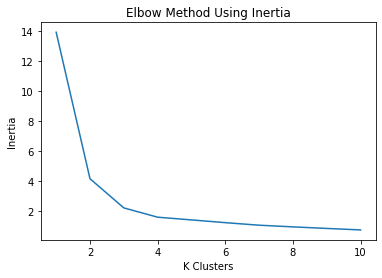

In [222]:
max_clusters = 10

inertias = []
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(arlington_neighborhoods_cluster_2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), inertias)
plt.title("Elbow Method Using Inertia")
plt.ylabel("Inertia")
plt.xlabel("K Clusters")

In [230]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(arlington_neighborhoods_cluster_2)

arlington_neighborhoods_2 = arlington_neighborhoods.drop(columns=['Cluster Labels'])
arlington_neighborhoods_2.insert(0, 'Cluster Labels', kmeans.labels_)
arlington_neighborhoods_2

,Cluster Labels,Latitude,Longitude,TOTAL POPULATION,Total Non-Hispanic or Latino,White alone,Black or African-American alone,American Indian or Alaska Native alone,Asian alone,Native Hawaiian or Pacific Islander Alone,Some other Race alone,Two or more Races,Total Hispanic or Latino,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Male,Female,TOTAL HOUSEHOLDS,Family households:,Husband-wife family,Other family:,"Male householder, no wife present","Female householder, no husband present",Nonfamily households:,Householder living alone,Householder not living alone,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household,TOTAL HOUSING UNITS,Occupied Housing Units,Owner-Occupied,Renter-Occupied,Vacant Housing Units
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcova Heights,0,38.864557,-77.097201,0.009497,0.761,0.582,0.047,0.003,0.097,0.000,0.003,0.029,0.239,0.075,0.116,0.078,0.205,0.169,0.163,0.121,0.047,0.019,0.006,0.490,0.510,0.008055,0.580,0.474,0.106,0.030,0.077,0.420,0.278,0.142,0.278,0.340,0.168,0.106,0.064,0.019,0.026,0.007963,0.950,0.696,0.254,0.050
Arlington Forest,1,38.868856,-77.113084,0.011111,0.927,0.823,0.017,0.001,0.047,0.004,0.001,0.034,0.073,0.101,0.155,0.054,0.125,0.196,0.145,0.122,0.069,0.021,0.012,0.506,0.494,0.009018,0.685,0.613,0.072,0.018,0.054,0.315,0.207,0.108,0.207,0.317,0.194,0.211,0.049,0.013,0.008,0.008654,0.979,0.823,0.156,0.021
Arlington Heights,0,38.869557,-77.092201,0.012771,0.770,0.576,0.060,0.002,0.101,0.003,0.004,0.025,0.230,0.079,0.108,0.063,0.213,0.194,0.147,0.113,0.057,0.016,0.009,0.499,0.501,0.011159,0.529,0.414,0.115,0.029,0.086,0.471,0.326,0.145,0.326,0.309,0.167,0.102,0.044,0.020,0.033,0.010868,0.964,0.595,0.369,0.036
Arlington Ridge,2,38.853570,-77.067980,0.031610,0.937,0.733,0.040,0.003,0.132,0.001,0.002,0.027,0.063,0.036,0.061,0.081,0.290,0.149,0.114,0.125,0.080,0.044,0.020,0.479,0.521,0.038374,0.352,0.313,0.039,0.012,0.026,0.648,0.492,0.156,0.492,0.343,0.090,0.051,0.016,0.006,0.002,0.038141,0.945,0.416,0.529,0.055
Arlington View,0,38.863079,-77.072591,0.004893,0.896,0.190,0.619,0.012,0.057,0.001,0.001,0.015,0.104,0.066,0.144,0.076,0.183,0.160,0.138,0.109,0.059,0.044,0.020,0.487,0.513,0.004066,0.598,0.298,0.301,0.077,0.223,0.402,0.287,0.114,0.287,0.309,0.165,0.122,0.056,0.029,0.032,0.003972,0.962,0.517,0.445,0.038
Arlingwood,1,38.927611,-77.121923,0.001829,0.959,0.888,0.019,0.005,0.025,0.000,0.008,0.014,0.041,0.066,0.208,0.036,0.033,0.101,0.169,0.183,0.101,0.063,0.041,0.478,0.522,0.001471,0.809,0.750,0.059,0.029,0.029,0.191,0.162,0.029,0.162,0.382,0.140,0.243,0.066,0.007,0.000,0.001503,0.919,0.851,0.068,0.081
Ashton Heights,0,38.876150,-77.100720,0.019803,0.856,0.685,0.063,0.001,0.082,0.000,0.003,0.022,0.144,0.049,0.108,0.111,0.281,0.142,0.126,0.112,0.048,0.017,0.007,0.521,0.479,0.018544,0.451,0.363,0.087,0.027,0.060,0.549,0.362,0.188,0.362,0.304,0.152,0.122,0.036,0.017,0.007,0.018050,0.965,0.385,0.580,0.035
Aurora Highlands,2,38.854200,-77.061060,0.043611,0.907,0.680,0.082,0.003,0.113,0.000,0.001,0.028,0.093,0.044,0.043,0.105,0.361,0.151,0.106,0.084,0.053,0.033,0.019,0.491,0.509,0.051944,0.297,0.255,0.042,0.012,0.030,0.703,0.507,0.196,0.507,0.326,0.095,0.050,0.014,0.006,0.003,0.056008,0.871,0.124,0.747,0.129
Ballston - Virginia Square,2,38.882006,-77.111514,0.068742,0.948,0.773,0.029,0.001,0.118,0.000,0.002,0.025,0.052,0.027,0.025,0.138,0.433,0.134,0.082,0.070,0.037,0.027,0.026,0.502,0.498,0.088859,0.240,0.203,0.038,0.014,0.023,0.760,0.514,0.245,0.514,0.363,0.083,0.031,0.007,0.001,0.001,0.090004,0.927,0.329,0.598,0.073


In [231]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for neigh, lat, lng, cluster in zip(arlington_neighborhoods_2.index, arlington_neighborhoods_2['Latitude'], arlington_neighborhoods_2['Longitude'], arlington_neighborhoods_2['Cluster Labels']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(int(cluster)+1), parse_html=True)
    folium.CircleMarker(
        [lat, lng], 
        radius=5, 
        popup=label, 
        color=rainbow[int(cluster)-1], 
        fill=True, 
        fill_color=rainbow[int(cluster)-1], 
        fill_opacity=0.7).add_to(map_clusters)

map_clusters